In [1]:
from ast import literal_eval
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
posts = pd.read_csv("./data/refined/post_with_seg.csv")
comments_by_author = pd.read_csv("./data/refined/comments_by_author_with_seg.csv")
posts['word_list'] = posts['word_list'].apply(literal_eval)
comments_by_author['word_list'] = comments_by_author['word_list'].apply(literal_eval)

# comments_by_author['comment_no_ppl_tag'] = comments_by_author['comment_no_ppl_tag'].fillna('')

In [3]:
comments_by_author['fanpage'] = comments_by_author['post_url'].map(posts.set_index('post_url')['fanpage'])
comments_by_author['phase'] = comments_by_author['post_url'].map(posts.set_index('post_url')['phase'])

<AxesSubplot:xlabel='post_url'>

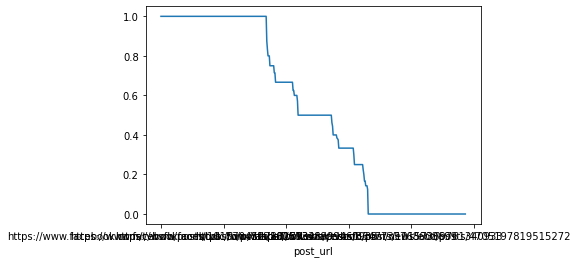

In [4]:
posts.set_index('post_url')['sentiment_score'].dropna().sort_values(ascending=False).plot()

<AxesSubplot:xlabel='post_url'>

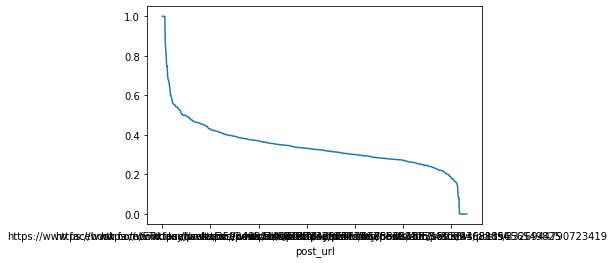

In [5]:
comments_by_author.groupby('post_url')['sentiment_score'].mean().sort_values(ascending=False).plot()

# Sentiment by fanpage

<AxesSubplot:xlabel='fanpage', ylabel='sentiment_score_filled'>

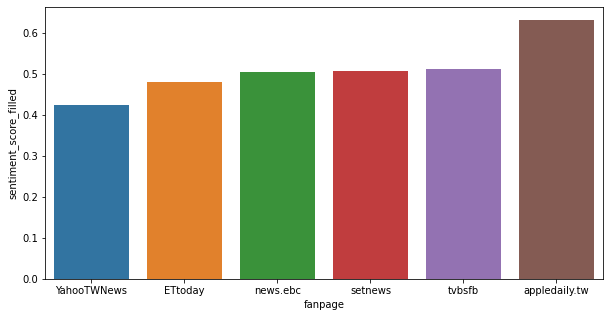

In [6]:
plt.subplots(figsize=(10,5))
temp = posts.groupby('fanpage')['sentiment_score_filled'].mean().sort_values().reset_index()
sns.barplot(x='fanpage',y='sentiment_score_filled',data=temp)

<AxesSubplot:xlabel='fanpage', ylabel='sentiment_score_filled'>

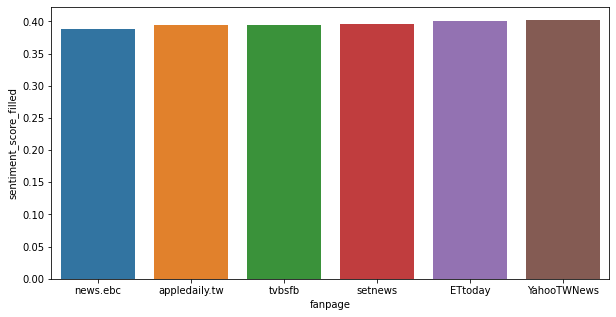

In [7]:
plt.subplots(figsize=(10,5))
temp = comments_by_author.groupby('fanpage')['sentiment_score_filled'].mean().sort_values().reset_index()
sns.barplot(x='fanpage',y='sentiment_score_filled',data=temp)

# Sentiment by phase

<AxesSubplot:xlabel='phase', ylabel='sentiment_score_filled'>

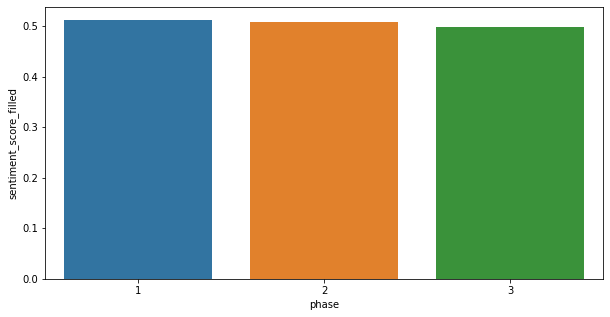

In [8]:
plt.subplots(figsize=(10,5))
temp = posts.groupby('phase')['sentiment_score_filled'].mean().sort_values().reset_index()
sns.barplot(x='phase',y='sentiment_score_filled',data=temp)

<AxesSubplot:xlabel='phase', ylabel='sentiment_score_filled'>

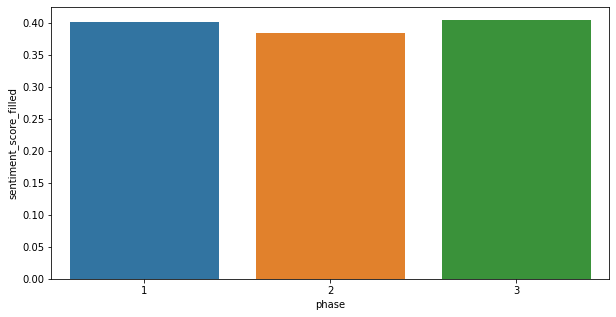

In [9]:
plt.subplots(figsize=(10,5))
temp = comments_by_author.groupby('phase')['sentiment_score_filled'].mean().sort_values().reset_index()
sns.barplot(x='phase',y='sentiment_score_filled',data=temp)

# Sentiment by post LDA topic

# Sentiment by comment LDA topic

# Sentiment by fanpage x period

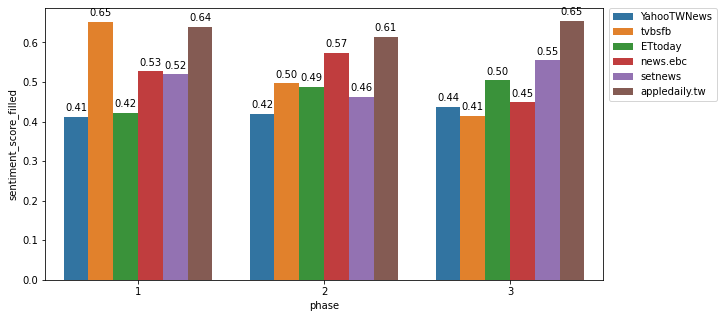

In [10]:
plt.subplots(figsize=(10,5))
temp = posts.groupby(['fanpage','phase'])['sentiment_score_filled'].mean().sort_values().reset_index()
plot = sns.barplot(x='phase',y='sentiment_score_filled',hue="fanpage",data=temp)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

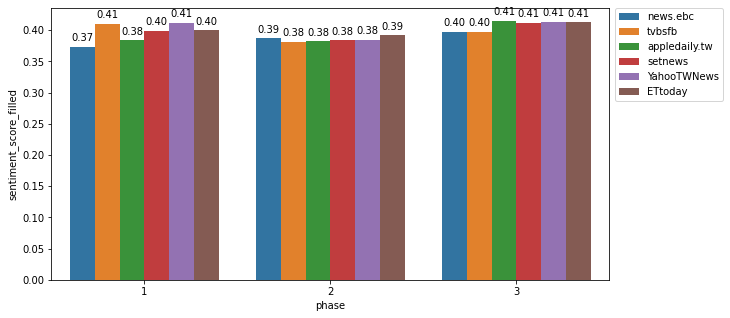

In [11]:
plt.subplots(figsize=(10,5))
temp = comments_by_author.groupby(['fanpage','phase'])['sentiment_score_filled'].mean().sort_values().reset_index()
plot = sns.barplot(x='phase',y='sentiment_score_filled',hue="fanpage",data=temp)
plt.legend(bbox_to_anchor=(1.01, 1), borderaxespad=0)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.2f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

# Sentiment by fanpage x LDA topic